In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#PATH_TO_DATA = '/media/andrii/earth/Katia/CS_MasterThesis/data/'
PATH_TO_DATA_RL = '/home/katia/Documents/ComputerScience/UCU_Master_Program/MasterThesis/data/'

In [5]:
with_gt_df = pd.read_csv(PATH_TO_DATA_RL+'red_links_uk_with_features.csv', encoding = 'UTF-8')

In [6]:
with_gt_df.head()

,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score
0,Pachetra sagittigera,Phytometra viridaria,False,0,0.081,0.650
1,Pachetra sagittigera,Conistra rubiginea,False,0,0.076,0.600
2,Pachetra sagittigera,Tholera decimalis,False,0,0.068,0.750
3,Pachetra sagittigera,Pachetra sagittigera,True,0,0.066,0.000
4,Pachetra sagittigera,Hoplodrina octogenaria,False,0,0.066,0.727


In [7]:
with_gt_df.shape

(2964382, 6)

## Distribution for Jaccard scores

In [8]:
# check items with the worst Jaccard score and still TRUE
worst_score = min(with_gt_df['jaccard_score'])
min_score_df = with_gt_df[with_gt_df['jaccard_score'] == worst_score]
print('Number of items with the worst Jaccard score and still TRUE is', len(min_score_df[min_score_df['true_label'] == True]))

Number of items with the worst Jaccard score and still TRUE is 25


In [34]:
# check items with the best Jaccard score and TRUE
max_score_df = with_gt_df[with_gt_df['jaccard_score'] > 0.6]
print('Number of items with the best Jaccard score is', len(max_score_df))
print('Number of items with the best Jaccard score and TRUE is', len(max_score_df[max_score_df['true_label'] == True]))

Number of items with the best Jaccard score is 1045
Number of items with the best Jaccard score and TRUE is 0


In [45]:
# check items with Jaccard score 0.001-0.03 and TRUE
upper_bound = 0.03
some_score_df = with_gt_df[with_gt_df['jaccard_score'] < upper_bound]
print('Number of items with' + ' less then ' + str(upper_bound) + ' ' + 'Jaccard score is', len(some_score_df))
print('Number of items with' + ' less then ' + str(upper_bound) + ' ' + 'Jaccard score and TRUE is', len(some_score_df[some_score_df['true_label'] == True]))

Number of items with less then 0.03 Jaccard score is 844283
Number of items with less then 0.03 Jaccard score and TRUE is 665


In [9]:
with_gt_df['true_label'].value_counts()

False    2962292
True        2090
Name: true_label, dtype: int64

In [10]:
min_score_df[min_score_df['true_label'] == True]

,red_link_name,candidate,true_label,BN_results,jaccard_score,levenstein_score
12467,Parastichtis suspecta,Parastichtis suspecta,True,0,0.001,0.000
81233,Куніцин Ігор Костянтинович,Igor Kunitsyn,True,0,0.001,0.846
90547,Крістоф Вліген,Kristof Vliegen,True,0,0.001,0.133
106616,Драфт НХЛ 1998,1998 NHL Entry Draft,True,0,0.001,0.900
188029,Jodis lactearia,Jodis lactearia,True,1,0.001,0.000
231325,Седа Норландер,Seda Noorlander,True,0,0.001,0.067
244463,Чемпіонат Європи з академічного веслування 2016,2016 European Rowing Championships,True,0,0.001,0.894
252684,Пучкова Ольга Олексіївна,Olga Puchkova,True,0,0.001,0.833
328698,Hyppa rectilinea,Hyppa rectilinea,True,0,0.001,0.000
386923,Андреа Леанд,Andrea Leand,True,0,0.001,0.000


In [15]:
# define number of bins and round its values
bins_j = np.linspace(0,1,30).tolist()
bins_j = list(map(lambda x: round(x, 2), bins_j))

In [16]:
# get number of scores in each bin and indexes of scores in each bin
indexes = [[] for _ in range(len(bins_j)-1)]

for index in range(with_gt_df.shape[0]):
    for b in range(len(bins_j)-1):
        score = with_gt_df['jaccard_score'][index]
        if score < bins_j[b+1]:
            indexes[b].append(index)
            break

In [17]:
number_of_scores_in_bin = list(map(lambda x: len(x), indexes))

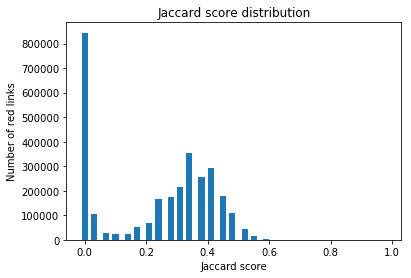

In [69]:
# plot Jaccard score distribution
plt.bar(bins_j[:-1], number_of_scores_in_bin, width=0.02, align='center')
plt.xlabel('Jaccard score')
plt.ylabel('Number of red links')
plt.title('Jaccard score distribution')
plt.show()

In [26]:
# get a number of true values in each bin
trues_all = []
for i in indexes:
    trues = list(map(lambda x: with_gt_df['true_label'][x], i))
    trues_all.append(trues)

truess = list(map(lambda x: x.count(True), trues_all))

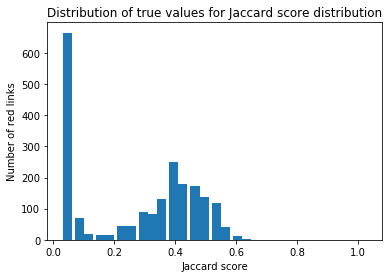

In [74]:
# plot distribution of true values
plt.bar(bins_j[1:], truess, width=0.03, align='edge')
plt.xlabel('Jaccard score')
plt.ylabel('Number of red links')
plt.title('Distribution of true values for Jaccard score distribution')
plt.show()

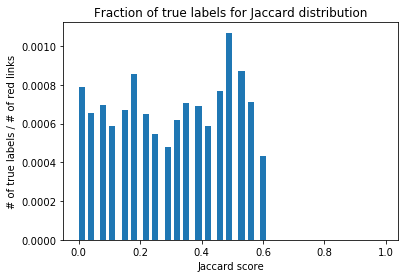

In [78]:
plt.bar(bins_j[:-1], np.array(truess) / np.array(number_of_scores_in_bin), width=0.02, align='edge')
plt.xlabel('Jaccard score')
plt.ylabel('# of true labels / # of red links')
plt.title('Fraction of true labels for Jaccard distribution')
plt.show()

## Distribution for Levenstein scores

In [46]:
# check items with the worst Levenstein score and still TRUE
worst_score_ld = max(with_gt_df['levenstein_score'])
ld_score_df = with_gt_df[with_gt_df['levenstein_score'] >= round(worst_score_ld)]
print('Number of items with the worst Levenstein score and still TRUE is', len(ld_score_df[ld_score_df['true_label'] == True]))

Number of items with the worst Levenstein score and still TRUE is 34


In [55]:
# check items with the best Levenstein score and TRUE
best_score_ld = 0.1
ld_score_df_best = with_gt_df[with_gt_df['levenstein_score'] >= best_score_ld]
print('Number of items with the best Levenstein score and TRUE is', len(ld_score_df_best[ld_score_df_best['true_label'] == True]))

Number of items with the best Levenstein score and TRUE is 1235


In [61]:
# check items with Jaccard score 0.001-0.03 and TRUE
lower_bound = 0.8
some_ld_score_df = with_gt_df[with_gt_df['levenstein_score'] > lower_bound]
print('Number of items with' + ' more then ' + str(lower_bound) + ' ' + 'Levenstein score is', len(some_ld_score_df))
print('Number of items with' + ' more then ' + str(lower_bound) + ' ' + 'Levenstein score and TRUE is', len(some_ld_score_df[some_ld_score_df['true_label'] == True]))

Number of items with more then 0.8 Levenstein score is 1606501
Number of items with more then 0.8 Levenstein score and TRUE is 403


In [47]:
indexes_ld = [[] for _ in range(len(bins)-1)]

for index in range(with_gt_df.shape[0]):
    for b in range(len(bins)-1):
        score = with_gt_df['levenstein_score'][index]
        if score < bins[b+1]:
            indexes_ld[b].append(index)
            break

In [48]:
number_of_scores_in_bin_ld = list(map(lambda x: len(x), indexes_ld))

In [49]:
# get a number of true values in each bin
trues_all_ld = []
for i in indexes_ld:
    trues = list(map(lambda x: with_gt_df['true_label'][x], i))
    trues_all_ld.append(trues)

truess_ld = list(map(lambda x: x.count(True), trues_all_ld))

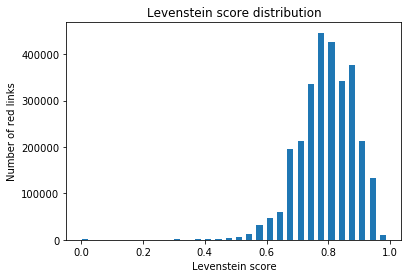

In [70]:
# plot Levenstein score distribution
plt.bar(bins[:-1], number_of_scores_in_bin_ld, width=0.02, align='edge')
plt.xlabel('Levenstein score')
plt.ylabel('Number of red links')
plt.title('Levenstein score distribution')
plt.show()

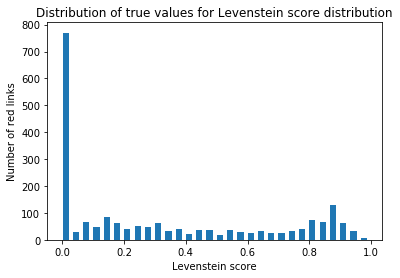

In [76]:
# plot distribution of true values
plt.bar(bins[:-1], truess_ld, width=0.02, align='edge')
plt.xlabel('Levenstein score')
plt.ylabel('Number of red links')
plt.title('Distribution of true values for Levenstein score distribution')
plt.show()

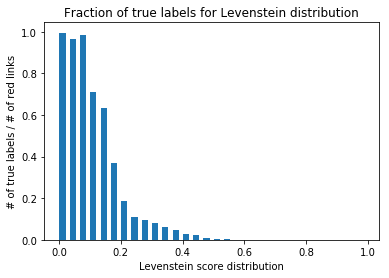

In [79]:
plt.bar(bins[:-1], np.array(truess_ld) / np.array(number_of_scores_in_bin_ld), width=0.02, align='edge')
plt.xlabel('Levenstein score distribution')
plt.ylabel('# of true labels / # of red links')
plt.title('Fraction of true labels for Levenstein distribution')
plt.show()